<a href="https://colab.research.google.com/github/huynhhoc/DataAnalystDeepLearning/blob/main/Labs/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Botplox

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

median (Q2/50th Percentile): the middle value of the dataset.

first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

interquartile range (IQR): 25th to the 75th percentile.
whiskers (shown in blue)

outliers (shown as green circles)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR

Nguồn (https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

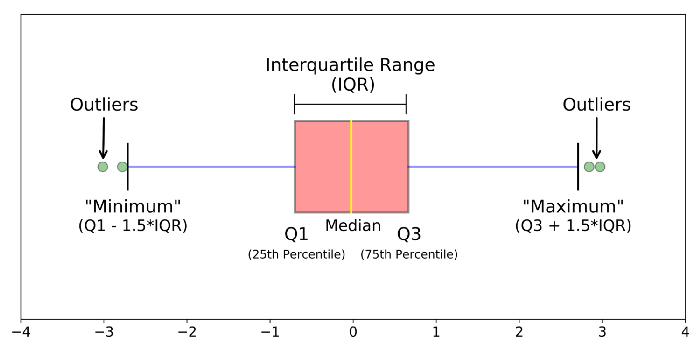

**Note**: Tìm hiểu thêm về Quy tắc 2 xích ma, 3 xích ma trong các tài liệu về xác suất thống kê (https://www.slideshare.net/minhphuongTeen/giao-trinh-xac-suat-thong-ke)

In [ ]:
import pandas as pd
datatitanic = pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv")

**Thí dụ**: Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi (**Age**) trên từng hạng hành khách (**Pclass**)

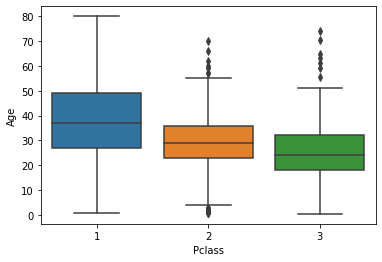

In [ ]:
import seaborn as sns
sns.boxplot(y='Age', x='Pclass', data = datatitanic)

**Nhận xét**: Phân phối tuổi trên hạng Pclass = 1 có dạng chuẩn hơn so với hạng 2 và hạng 3. Chi tiết hơn kết quả này, dưới đây là biểu đồ phân phối Age theo hạng (sử dụng hàm **[displot](https://seaborn.pydata.org/generated/seaborn.distplot.html)** của **seaborn**)

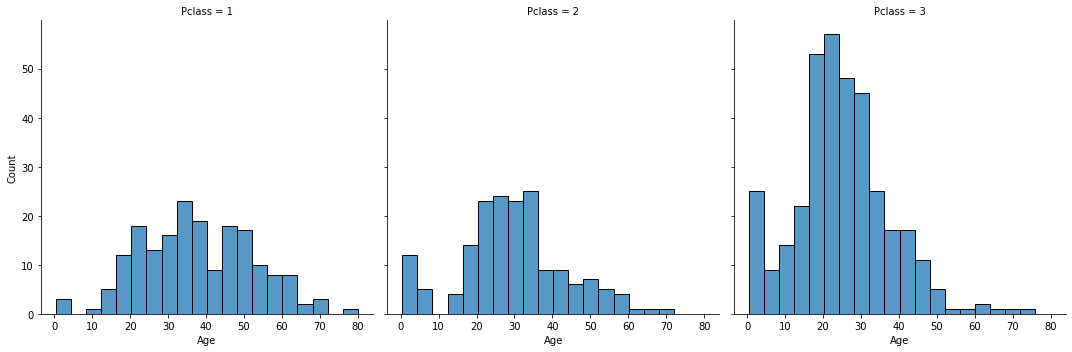

In [ ]:
sns.displot(datatitanic, x="Age", col="Pclass")

**Bài tập** 

***Mô tả dữ liệu***: The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered ―unsinkable‖ RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren‘t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
Link dữ liệu: (https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv)

 

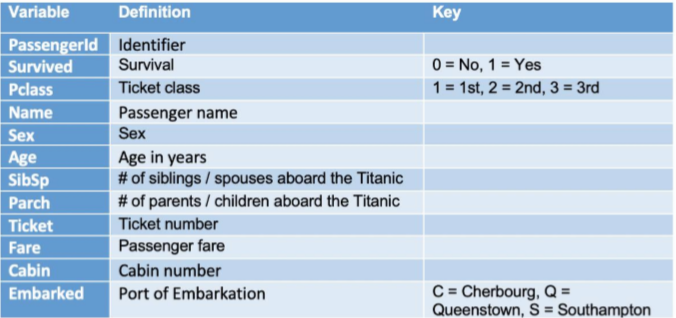

# PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING 

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên. 
2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked 
3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. 

**Lưu ý**: Sau khi tách cột xong thì xóa luôn cột Name 4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F 5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau



*   Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.
*   Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older 
7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách  Mr, Mrs, Miss, Master ra khỏi ―secondName
8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch 
9. Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.
10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown

# PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA 

12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính. 
13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).
14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác 
15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng 
16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé 
17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến. 